In [1]:
links = [
         # 'https://wolnelektury.pl/media/book/txt/quo-vadis.txt',
         'https://wolnelektury.pl/media/book/txt/w-pustyni-i-w-puszczy.txt',
         'https://wolnelektury.pl/media/book/txt/zemsta.txt',
         'https://wolnelektury.pl/media/book/txt/hamlet.txt',
         'https://wolnelektury.pl/media/book/txt/homer-iliada.txt',
         'https://wolnelektury.pl/media/book/txt/robinson-crusoe.txt',
         # 'https://wolnelektury.pl/media/book/txt/ksiega-dzungli.txt',
         # 'https://wolnelektury.pl/media/book/txt/dickens-opowiesc-wigilijna.txt',
         # 'https://wolnelektury.pl/media/book/txt/schopenhauer-o-religii.txt',
         # 'https://wolnelektury.pl/media/book/txt/machiavelli-traktat-o-ksieciu.txt',
         ]
# names = ['Quo vadis', 'W pustyni i w puszczy', 'Zemsta', 'Hamlet', 'Iliada', 'Robinson Crusoe', 'Księga dżungli',
#          'Opowieść wigilijna', 'O religii', 'Traktat o księciu']

# add up to 10 more and save it in list.
# download it with https://docs.python-requests.org/en/latest/

#expected outocme
#corpus  = [' Thisis the content of the first book',
#           'thisis the conent of the second book',
#           'thisis the conent of the third book' ]

import requests

books_content = []
for link in links:
    r = requests.get(link)
    books_content.append(r.text)

In [2]:
# !python -m spacy download pl_core_news_sm

In [3]:
import spacy
nlp = spacy.load('pl_core_news_sm')
nlp.max_length = 2000000
books = nlp.pipe(books_content)

In [4]:
books = list(books)

In [5]:
books[0]

Henryk Sienkiewicz

W pustyni i w puszczy

ISBN 978-83-288-2842-1




ROZDZIAŁ I

— Wiesz, Nel — mówił Staś Tarkowski do swojej przyjaciółki, małej Angielki — wczoraj przyszli zabtie (policjanci) i aresztowali żonę dozorcy Smaina i jej troje dzieci — tę Fatmę, która już kilka razy przychodziła do biura do twojego ojca i do mego.

A mała, podobna do ślicznego obrazka Nel podniosła swe zielonawe oczy na Stasia i zapytała na wpół ze zdziwieniem, a na wpół ze strachem:

— Wzięli ją do więzienia?

— Nie, ale nie pozwolili jej wyjechać do Sudanu i przyjechał urzędnik, który jej będzie pilnował, by ani krokiem nie wyruszyła z Port-Saidu.

— Dlaczego?

Staś, który kończył rok czternasty i który swą ośmioletnią towarzyszkę kochał bardzo, ale uważał za zupełne dziecko, rzekł z miną wielce zarozumiałą:

— Jak dojdziesz do mego wieku, to będziesz wiedziała wszystko, co się dzieje nie tylko wzdłuż kanału, od Port-Saidu do Suezu, ale i w całym Egipcie. Czy ty nic nie słyszałaś o Mahdim?

— Słyszałam

In [6]:
import pandas as pd

In [7]:
def get_pos_freq(book):
    pos = [token.pos_ for token in book]
    pos_freq = pd.Series(pos).value_counts()
    return pos_freq

In [8]:
get_pos_freq(books[0])

NOUN     22173
PUNCT    20228
VERB     16899
ADP      11573
ADJ       8787
PRON      8595
CCONJ     6699
ADV       5556
PART      5392
PROPN     4526
SCONJ     3829
DET       3561
SPACE     2828
AUX       1814
NUM        549
X          197
INTJ       142
Name: count, dtype: int64

In [9]:
def get_tag_freq(book):
    tags = [token.tag_ for token in book]
    tags_freq = pd.Series(tags).value_counts()
    return tags_freq

In [10]:
get_tag_freq(books[0])

SUBST      40877
INTERP     12132
PREP       11594
ADJ         9900
PRAET       8855
QUB         7746
CONJ        7560
ADV         4819
_SP         3192
FIN         3163
PPRON3      2953
COMP        2700
INF         2225
NUM          988
PPAS         753
PPRON12      686
PRED         537
PCON         496
GER          355
PACT         349
PANT         254
IMPT         246
BEDZIE       245
SIEBIE       226
BREV         158
IMPS         100
ADJP          77
NUMCOL        61
INTERJ        49
BURK          25
WINIEN        12
ADJC           8
AGLT           4
XXX            2
DEPR           1
Name: count, dtype: int64

In [82]:
def get_nouns(book_corpus):
    nouns = []
    for book in book_corpus:
        nouns.append(' '.join([token.lemma_ for token in book if token.pos_ == 'NOUN']))
    return nouns

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(get_nouns(books))

In [84]:
df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [86]:
word_cloud = []
for index, row in df.iterrows():
    word_cloud.append(WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(row))

In [88]:
a = []
for index, row in df.iterrows():
    a.append(row)
a[0]

abant         0.000000
abassanto     0.001658
abdullahi     0.003315
abisyńczyk    0.001658
achaje        0.000000
                ...   
żądza         0.000000
żądło         0.001658
żłobach       0.000000
żłobo         0.000000
żłób          0.000000
Name: 0, Length: 10724, dtype: float64

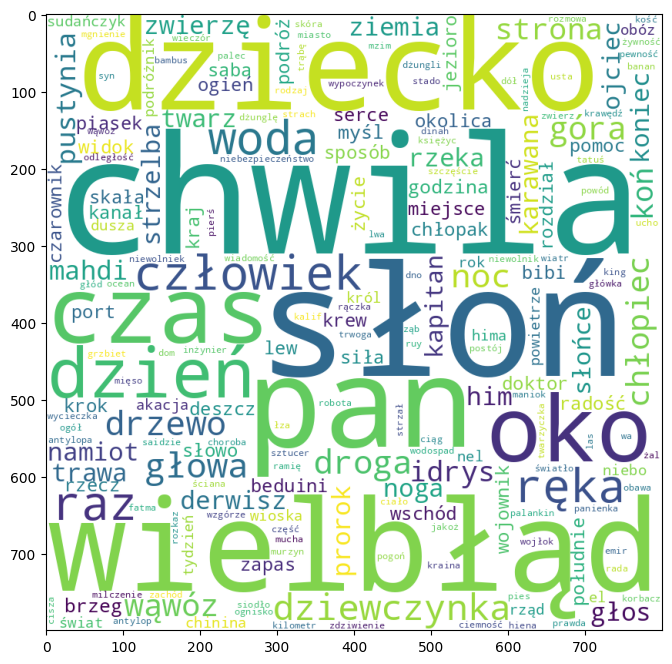

In [89]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud[0])

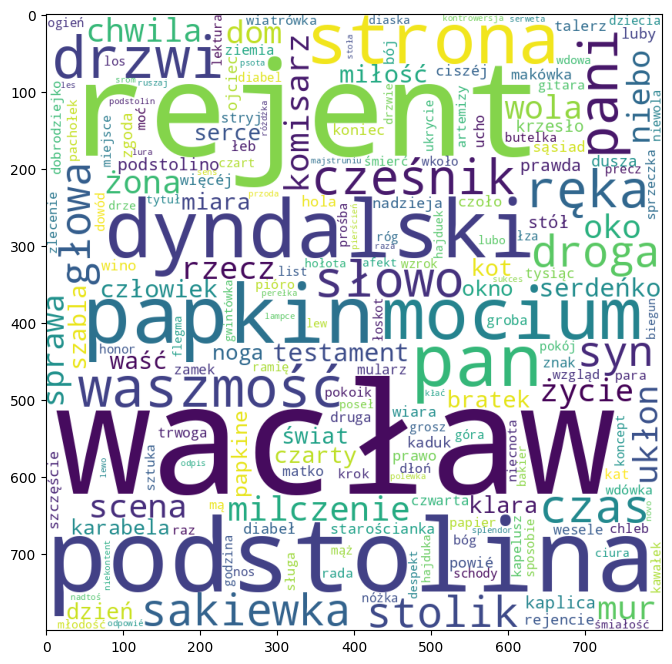

In [90]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud[1])

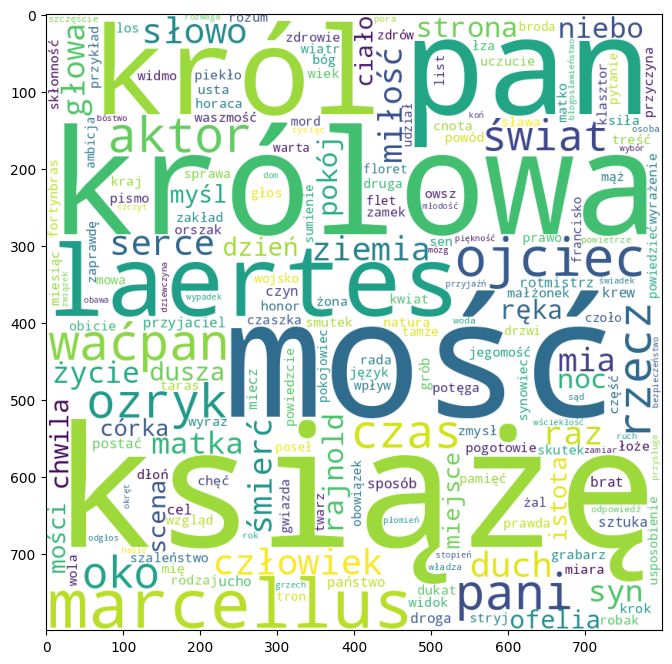

In [91]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud[2])

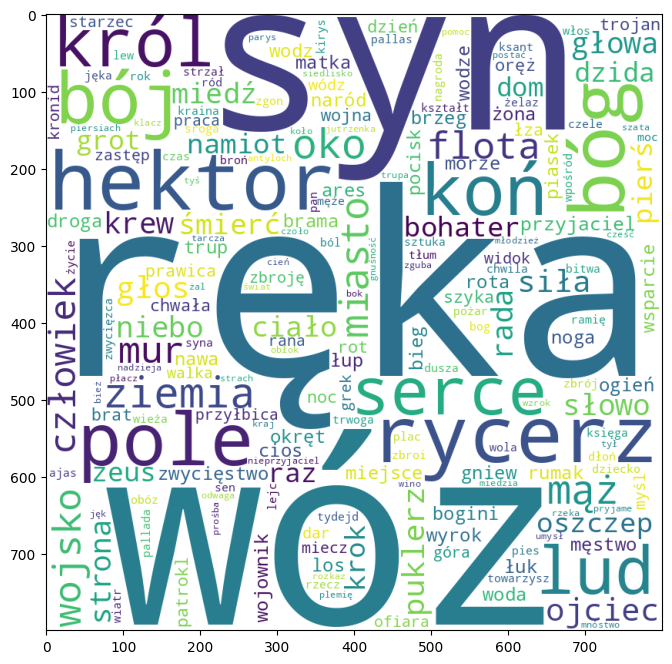

In [92]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud[3])

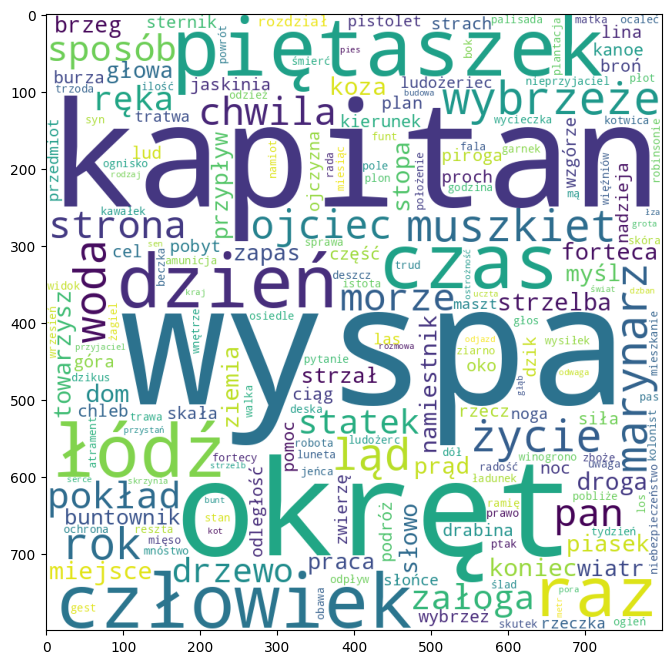

In [94]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud[4])